# Visualizations
Start creating altair visualizations to be implemented in final product

Also going to explore how to handle nulls

In [1]:
import sys
sys.path.append("../") 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scripts.utilities import *
import numpy as np

pd.options.display.max_rows = 200
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("../data_sets/df_cleaned.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'PUMA', 'NP', 'ACCESS', 'BATH', 'BDSP', 'BLD', 'BROADBND',
       'COMPOTHX', 'DIALUP', 'ELEFP', 'ELEP', 'FS', 'FULFP', 'GASFP', 'HFL',
       'HISPEED', 'LAPTOP', 'OTHSVCEX', 'REFR', 'RMSP', 'RNTM', 'RNTP', 'RWAT',
       'SATELLITE', 'SINK', 'SMARTPHONE', 'STOV', 'TABLET', 'TEL', 'TEN',
       'VEH', 'WATFP', 'YBL', 'GRNTP', 'GRPIP', 'HHL', 'HHLANP', 'HHT',
       'HINCP', 'HUGCL', 'HUPAC', 'HUPAOC', 'HUPARC', 'KIT', 'LNGI', 'MULTG',
       'MV', 'NOC', 'NPP', 'NR', 'NRC', 'PARTNER', 'PLM', 'PSF', 'R18', 'R60',
       'R65', 'RESMODE', 'SRNT', 'SSMC', 'WGTP_CLT', 'AMI', 'AFF_OCC',
       'COST_BURDALL'],
      dtype='object')

In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)

## Some Basic Plots

In [5]:
from scripts.utilities import *

#Basic plots
'''
Plot histogram of the given data

Parameters:
    column: name of the column of interest
    
Returns:
    hist: Altair Interactive Histogram
'''
def histogram(column):
    hist = alt.Chart(df).mark_bar().encode(
        alt.X(column, bin=False),
        y='count()',
    ).properties(title = column+" Distribution").interactive()
    return hist


'''
Plot the scatter plot of two columns

Parameters:
    col1: name of first column of interest
    col2: name of second column of interest
Returns:
    scat: Altair Interactive Scatter
'''
def scatter(col1, col2):
    types = [DATA_TYPES_ALTAIR[get_datatype(x)] for x in [col1, col2]]
    scat = alt.Chart(df).mark_circle().encode(
        alt.X(col1, type = types[0]),
        alt.Y(col2, type = types[1]),
    ).properties(title = col1 + ' vs ' + col2).interactive()
    return scat

In [6]:
correlations = df.corr()

In [7]:
correlations

PUMA        NP    ACCESS      BATH      BDSP       BLD  \
PUMA          1.000000  0.077654 -0.085667  0.040333  0.155672 -0.110746   
NP            0.077654  1.000000 -0.080881 -0.003468  0.488142 -0.346798   
ACCESS       -0.085667 -0.080881  1.000000  0.014978 -0.091533  0.010762   
BATH          0.040333 -0.003468  0.014978  1.000000  0.015731 -0.020083   
BDSP          0.155672  0.488142 -0.091533  0.015731  1.000000 -0.644176   
BLD          -0.110746 -0.346798  0.010762 -0.020083 -0.644176  1.000000   
BROADBND      0.017395 -0.018917 -0.142157 -0.013428 -0.003868  0.013118   
COMPOTHX     -0.014122 -0.034919  0.023867  0.004025 -0.005683 -0.003675   
DIALUP       -0.009056  0.005767  0.041461  0.003917  0.011545  0.004145   
ELEFP        -0.020189  0.115528 -0.148802 -0.071493  0.074030 -0.127694   
ELEP          0.055905  0.297618  0.076311  0.021776  0.366493 -0.346097   
FS            0.091779 -0.177914 -0.176674 -0.041147 -0.051625  0.060900   
FULFP        -0.007840  0.001387 -0.022724 -0.129454  0.068526 -0.117111   
GASFP         0.036250  0.208464 -0.068154  0.046613  0.326617 -0.426214   
HFL          -0.019424 -0.157565  0.064326 -0.033836 -0.307994  0.369907   
HISPEED      -0.046581  0.026483 -0.153976 -0.014545  0.010065 -0.058694   
LAPTOP       -0.108180 -0.042730  0.494541  0.023330 -0.088634  0.002423   
OTHSVCEX      0.032833 -0.055205  0.041461  0.003917  0.023342 -0.016166   
REFR          0.021791 -0.032072  0.069170  0.631839 -0.047540  0.006589   
RMSP          0.144441  0.409886 -0.095893  0.011829  0.810783 -0.598579   
RNTM         -0.082704  0.092316 -0.133952  0.004901  0.106708 -0.122092   
RNTP          0.115641  0.072467 -0.221259 -0.013202  0.195415  0.046696   
RWAT          0.040333 -0.003468  0.014978  1.000000  0.015731 -0.020083   
SATELLITE     0.005689 -0.026466  0.078084  0.007376 -0.047419  0.051130   
SINK          0.040333 -0.003468  0.014978  1.000000  0.015731 -0.020083   
SMARTPHONE   -0.052962 -0.117408  0.497445  0.044657 -0.105108  0.037866   
STOV          0.036394 -0.020128  0.078227  0.425154 -0.049572  0.013249   
TABLET       -0.096568 -0.201294  0.362106  0.008602 -0.143925  0.055012   
TEL          -0.014174 -0.050814  0.157182  0.130047 -0.068749  0.042215   
TEN           0.054433 -0.006939  0.038746 -0.005246  0.130211 -0.154241   
VEH           0.110070  0.401033 -0.230952  0.026775  0.371375 -0.264605   
WATFP         0.112921  0.123368 -0.156507  0.006231  0.158280 -0.219414   
YBL           0.086661 -0.116150 -0.110558 -0.015901 -0.200992  0.415265   
GRNTP         0.122993  0.157295 -0.219801 -0.013514  0.296207 -0.074253   
GRPIP        -0.033885 -0.082827  0.173821 -0.018338  0.029301 -0.015649   
HHL           0.038453  0.218524 -0.038182 -0.015473 -0.022307  0.044134   
HHLANP       -0.029205 -0.286008  0.017558  0.017980 -0.001917 -0.011691   
HHT          -0.126703 -0.556610  0.048938 -0.004198 -0.289167  0.234256   
HINCP         0.074240  0.133082 -0.190979  0.001657  0.127156 -0.020820   
HUGCL        -0.022006  0.239891 -0.006408 -0.005329  0.132411 -0.084084   
HUPAC        -0.088738 -0.618544  0.045266 -0.035141 -0.308640  0.217496   
HUPAOC       -0.100634 -0.576017  0.051726 -0.038110 -0.273111  0.194674   
HUPARC       -0.091233 -0.606848  0.042548 -0.035465 -0.299133  0.210296   
KIT           0.036394 -0.020128  0.078227  0.425154 -0.049572  0.013249   
LNGI         -0.022681  0.157037  0.072058 -0.009791 -0.009107  0.023915   
MULTG        -0.029025  0.255412 -0.003081 -0.005162  0.118949 -0.081547   
MV           -0.036310  0.032368  0.157095  0.026626  0.137670 -0.214491   
NOC           0.075744  0.773397 -0.026770  0.001882  0.341255 -0.240101   
NPP           0.007934 -0.004248 -0.016844 -0.001591  0.026462  0.002900   
NR           -0.061804  0.221461 -0.082021 -0.017270  0.124662 -0.063680   
NRC           0.062655  0.824704 -0.028681  0.000544  0.363875 -0.262635   
PARTNER      -0.013899  0.162010 -0.047807 -0.011760  0.051001 -0.

<AxesSubplot:>

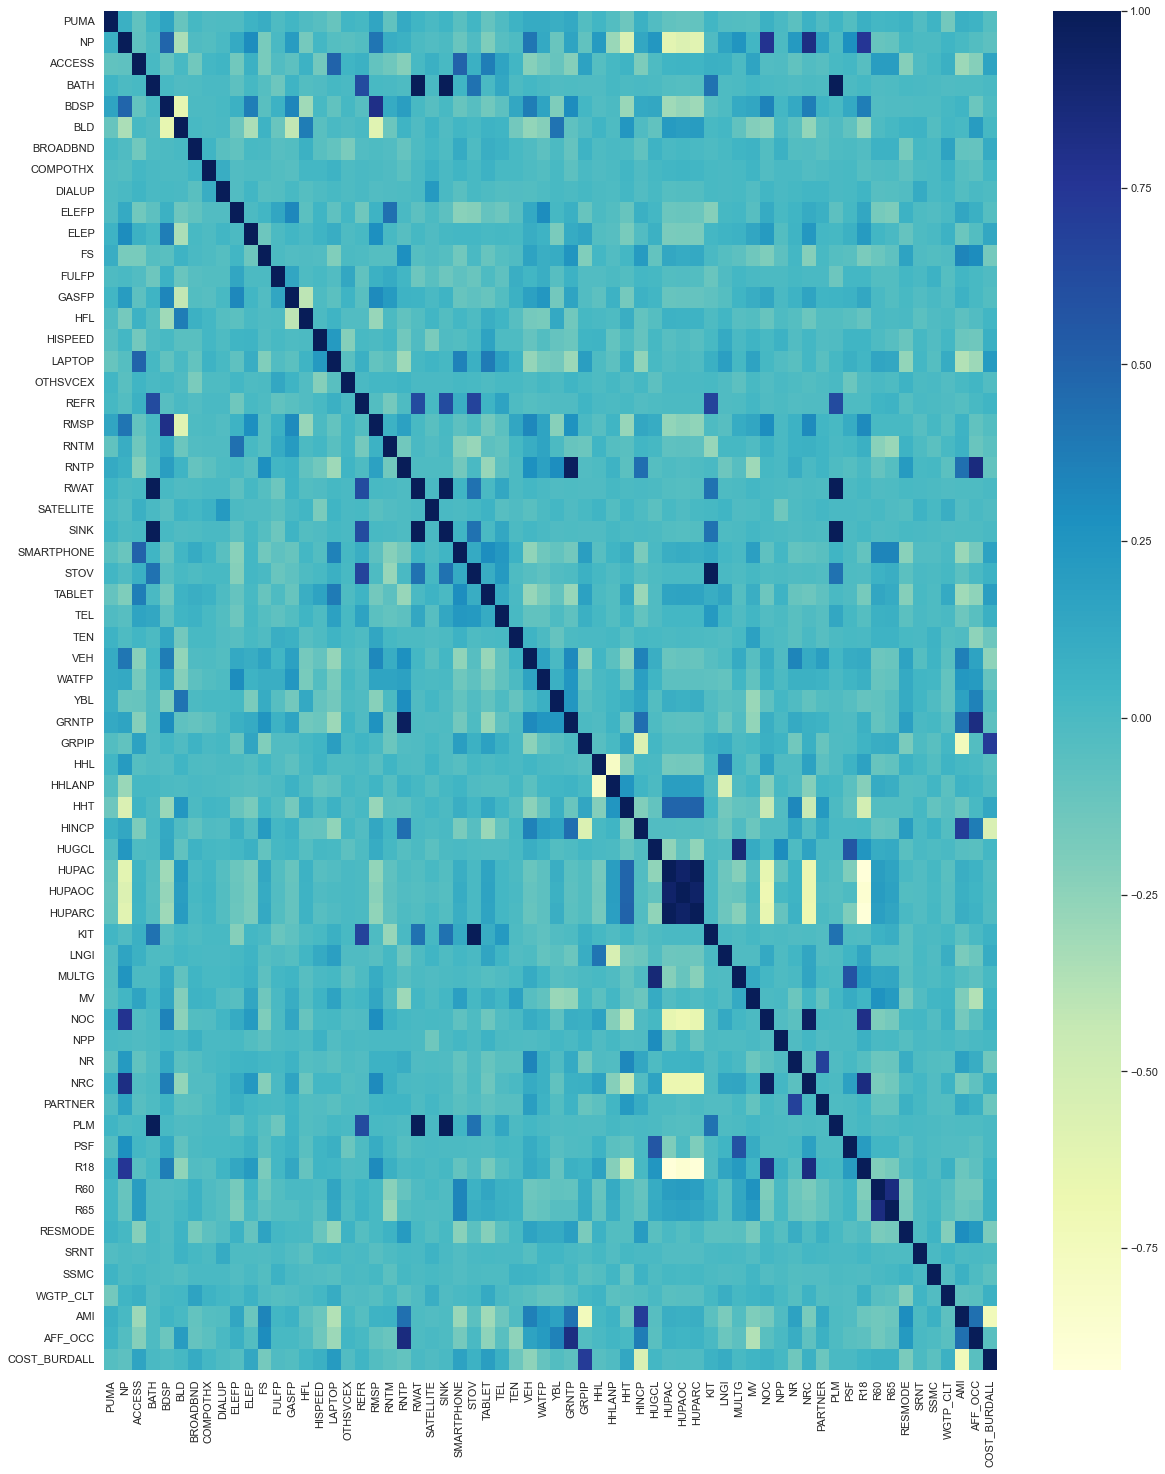

In [8]:
'''
I'm wondering if we could have a feature where users can
select what part variables to include in the heatmap
'''

#visualize scores of first 20 sentences
sns.set(rc={"figure.figsize":(20,25)})
sns.heatmap(correlations, cmap="YlGnBu", annot=False)

We can see some hints of multi-collinearity scattered throughout the heat map

In [9]:
scatter('COST_BURDALL', 'GRPIP')

alt.Chart(...)

We can see that Cost Burden was likely derived from GRPIP

In [10]:
scatter('AMI','HINCP')

alt.Chart(...)

In [11]:
get_values('AMI')

('Area Median Income for the household',
 {1: '30% and Below',
  2: '31 to 50%',
  3: '51 to 60%',
  4: '61 to 80%',
  5: '81 to 100%',
  6: '101 to 120%',
  7: 'Greater than 120%'})

In [12]:
histogram('GRNTP')

alt.Chart(...)

## Trying some slightly more features

In [13]:
alt.Chart(df).mark_circle().encode(
        alt.X('ELEP', type = 'nominal'),
        alt.Y('HINCP', type = 'quantitative'),
        color = 'COST_BURDALL:N',
    ).properties(title = 'Scatter!!').interactive()


alt.Chart(...)

**NOTES** Visualize percentage of households that are cost burdened, AMI (how many households make less/more in the area, Distribution of affordability

Perhaps below the landing page, will include non-interactive plots that show the current issues in the market



**TODO** 
- Attempt Making an Interactive Heatmap based on Slicing and Selection
- Explore visualizations spe